In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data_full_sekres.xlsx')

# Create columns for battery in and battery out

In [36]:
df1 = df.copy()

#Create column of battery output and set negatives as zero
df1['Battery_Out'] = df1['battery_0__actualPower']
num = df1['Battery_Out']._get_numeric_data()
num[num < 0] = 0

#Create column of battery input and set positives as zero
df1['Battery_In'] = df1['battery_0__actualPower']
num = df1['Battery_In']._get_numeric_data()
num[num > 0] = 0
df1['Battery_In'] = df1['Battery_In']*(-1)


# Normalize battery and propulsion columns

In [39]:
#Normalize battery output
df1['Battery_Out'] = (df1['Battery_Out'] - df1['Battery_Out'].min()) / (df1['Battery_Out'].max() - df1['Battery_Out'].min())

#Normalize battery intput
df1['Battery_In'] = (df1['Battery_In'] - df1['Battery_In'].min()) / (df1['Battery_In'].max() - df1['Battery_In'].min())


#Normalize sum propulsion output
df1['thrusterAndPropulsion'] = (df1['thrusterAndPropulsion'] - df1['thrusterAndPropulsion'].min()) / (df1['thrusterAndPropulsion'].max() - df1['thrusterAndPropulsion'].min())

#Normalize sum generator output
df1['sumEngMdoPower'] = (df1['sumEngMdoPower'] - df1['sumEngMdoPower'].min()) / (df1['sumEngMdoPower'].max() - df1['sumEngMdoPower'].min())


# Plot time series of battery output and propulsion

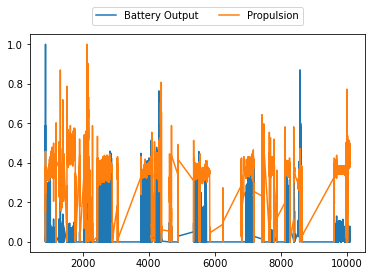

In [18]:
x = df1['timeVectRelMinutes']
y1 = df1['Battery_Out']
y2 = df1['thrusterAndPropulsion']

fig = plt.figure()

plt.plot(x, y1, label = 'Battery Output')
plt.plot(x, y2, label = 'Propulsion')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)


plt.draw()

# Update the plot
plt.show()

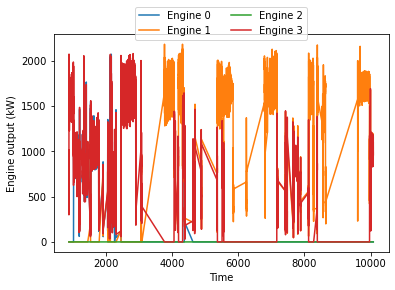

In [22]:

x1 = df1['timeVectRelMinutes']
y10 = df1['engMdoPower_0_']
y11 = df['engMdoPower_1_']
y12 = df['engMdoPower_2_']
y13 = df['engMdoPower_3_']

fig = plt.figure()

plt.plot(x1, y10, label = 'Engine 0')
plt.plot(x1, y11, label = 'Engine 1')
plt.plot(x1, y12, label = 'Engine 2')
plt.plot(x1, y13, label = 'Engine 3')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xlabel('Time')
plt.ylabel('Engine output (kW)')


plt.draw()

# Update the plot
plt.show()

# Battery out vs. sum engine power


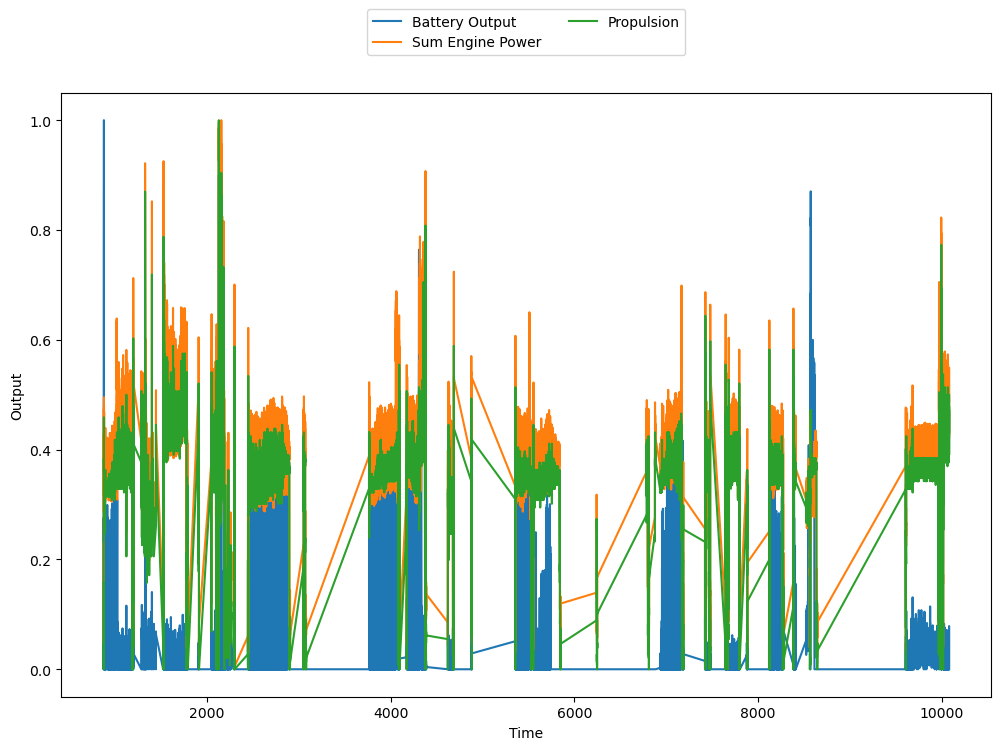

In [28]:
#Normalize sum engine output
df1['sumEngMdoPower'] = (df1['sumEngMdoPower'] - df1['sumEngMdoPower'].min()) / (df1['sumEngMdoPower'].max() - df1['sumEngMdoPower'].min())

y21 = df1['sumEngMdoPower']

fig = plt.figure()

plt.plot(x, y1, label = 'Battery Output')
plt.plot(x, y21, label = 'Sum Engine Power')
plt.plot(x, y2, label = 'Propulsion')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xlabel('Time')
plt.ylabel('Output')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

plt.draw()

# Update the plot
plt.show()

# Looking at battery, engine and propulsion of one OpID3 interval

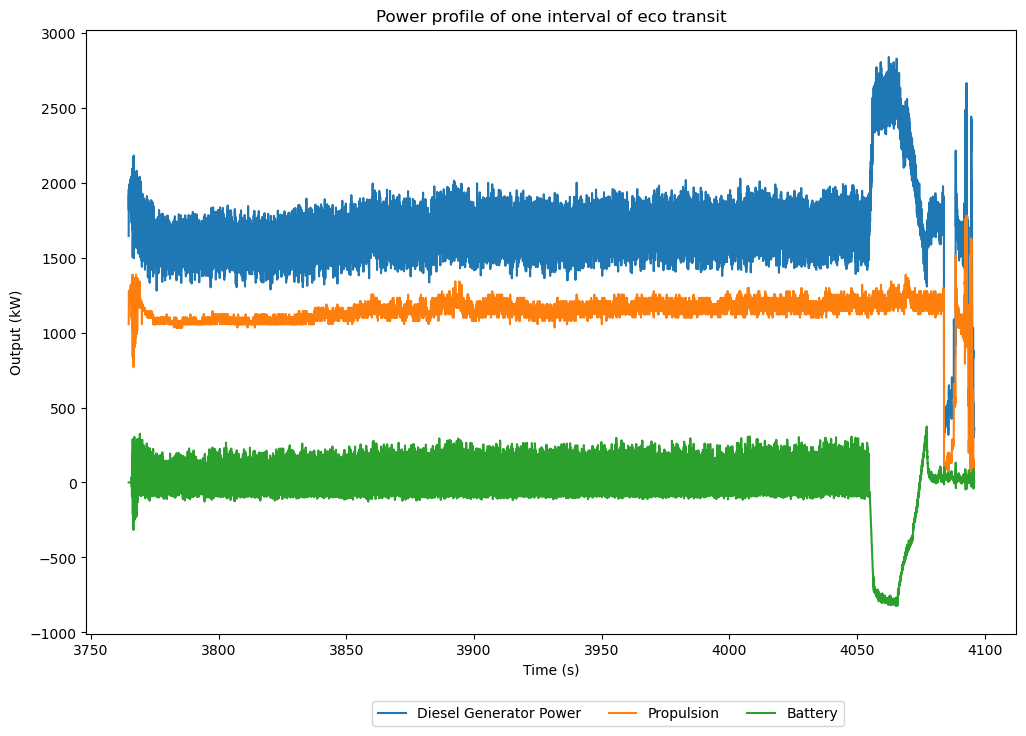

In [49]:
#df2.iloc[72639:92507]

df2 = df.copy()

#Create column of battery output and set negatives as zero
df2['Battery_Out'] = df2['battery_0__actualPower']
num = df2['Battery_Out']._get_numeric_data()
num[num < 0] = 0

#Create column of battery input and set positives as zero
df2['Battery_In'] = df2['battery_0__actualPower']
num = df2['Battery_In']._get_numeric_data()
num[num > 0] = 0
df2['Battery_In'] = df2['Battery_In']*(-1)

x = df2.iloc[72639:92505]['timeVectRelMinutes']
y1 = df2.iloc[72639:92505]['Battery_Out']
y2 = df2.iloc[72639:92505]['thrusterAndPropulsion']
y21 = df2.iloc[72639:92505]['sumEngMdoPower']
#y99 = df2.iloc[72639:92505]['Battery_In']
y31 = df2.iloc[72639:92505]['battery_0__actualPower']

fig = plt.figure()

#plt.plot(x, y1, label = 'Battery Output')
plt.plot(x, y21, label = 'Diesel Generator Power')
plt.plot(x, y2, label = 'Propulsion')
#plt.plot(x, y99, label = 'Battery In')
plt.plot(x, y31, label = 'Battery')

plt.legend(loc="upper left", bbox_to_anchor=(0.3, -0.1), ncol=3)
plt.xlabel('Time (s)')
plt.ylabel('Output (kW)')
plt.title('Power profile of one interval of eco transit')


plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

plt.draw()

# Update the plot
plt.show()

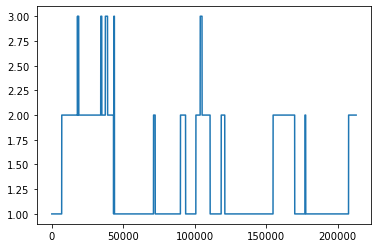

In [7]:
df3 = df.copy()
df3 = df3.loc[df3['operationId'] == 3]

df3['secs'] = np.arange(0, len(df3),1)

x = df3['secs']
y = df3['numberOfMdoEnginesRunning']

plt.plot(x,y)

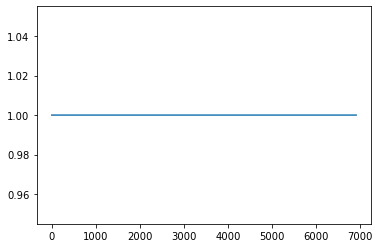

In [28]:
x = df3.iloc[:6912]['secs']
y = df3.iloc[:6912]['numberOfMdoEnginesRunning']

plt.plot(x,y)

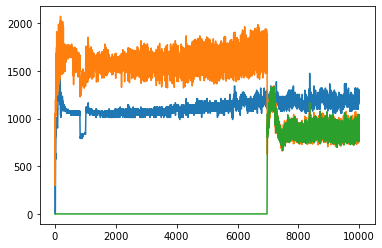

In [41]:
x = df3.iloc[:10000]['secs']
y = df3.iloc[:10000]['thrusterAndPropulsion']
y1 = df3.iloc[:10000]['engMdoPower_3_']
y2 = df3.iloc[:10000]['engMdoPower_0_']
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)

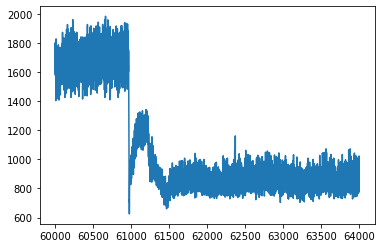

In [44]:
df3['Index'] = df3.index
x = df3.iloc[6000:10000]['Index']
y = df3.iloc[6000:10000]['engMdoPower_3_']

plt.plot(x,y)

I first thought that the jump from one to two engines was due to indexing and that in real life there were other operations between these, but as can be seen below, this change is instant and i dont understand why

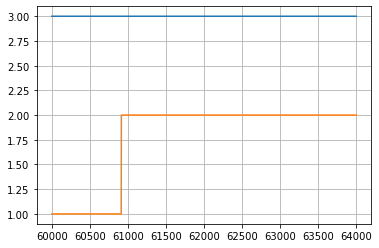

In [73]:
#lets try to find the same section in the whole dataset, to see what happens between these sections of transit eco
df['secs'] = np.arange(0, len(df),1)
df['Index'] = df.index

#Set Op ID 100 to 10
num = df['operationId']._get_numeric_data()
num[num == 100] = 10


x = df.iloc[60000:64000]['Index']
y = df.iloc[60000:64000]['operationId']
y1 = df.iloc[60000:64000]['numberOfMdoEnginesRunning']

plt.plot(x,y)
plt.plot(x,y1)
plt.grid()

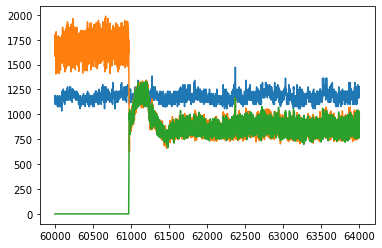

In [72]:
x = df.iloc[60000:64000]['secs']
y = df.iloc[60000:64000]['thrusterAndPropulsion']
y1 = df.iloc[60000:64000]['engMdoPower_3_']
y2 = df.iloc[60000:64000]['engMdoPower_0_']

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)

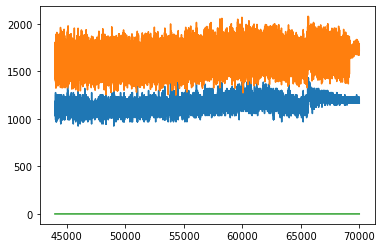

In [75]:
x = df3.iloc[44000:70000]['secs']
y = df3.iloc[44000:70000]['thrusterAndPropulsion']
y1 = df3.iloc[44000:70000]['engMdoPower_3_']
y2 = df3.iloc[44000:70000]['engMdoPower_0_']
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)